# 제 4장 데이터 전처리
#### [깃허브 주소](https://github.com/ADPclass/ADP_book_ver01/blob/main/%EC%A0%9C4%EC%9E%A5_%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%A0%84%EC%B2%98%EB%A6%AC/Ch%204.ipynb)
#### 가상환경에서 패키지 설치 방법
1. Anaconda Prompt (anaconda3) 접속
2. 가상환경 활성화 
    - activate <가상환경 이름(adp_code)>
3. 가상환경이 활성화된 상태에서 패키지 설치
    - pip install <패키지 이름>==<버전>

In [1]:
# !pip install pandas==1.1.2
import pandas as pd
# print(pd.__version__)
import sklearn
# print(sklearn.__version__)
import numpy as np
# print(np.__version__)
import matplotlib.pyplot as plt
import seaborn as sns
# print(sns.__version__)

### 이상치 확인

In [19]:
from sklearn.datasets import load_wine
wine_load = load_wine()
wine = pd.DataFrame(wine_load.data, columns=wine_load.feature_names)
wine['Class'] = wine_load.target
wine['Class'] = wine['Class'].map({0:'class_0', 1:'class_1', 2:'class_2'})

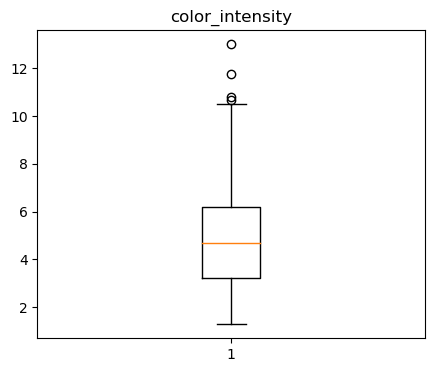

In [20]:
# 이상치 확인1
plt.figure(figsize=(5,4))
plt.boxplot('color_intensity', data=wine, whis=1.5)
plt.title('color_intensity')
plt.show()

In [21]:
# 이상치 확인2
def outliers_iqr(dt, col):
    quartile_1, quartile_3 = np.percentile(dt[col], [25, 75])
    iqr = quartile_3 - quartile_1
    lower_whis = quartile_1 - (iqr*1.5)
    upper_whis = quartile_3 + (iqr*1.5)
    outliers = dt[(dt[col] > upper_whis) | (dt[col] < lower_whis)]
    return outliers[[col]]

outliers = outliers_iqr(wine, 'color_intensity')
outliers

,color_intensity
151,10.80
158,13.00
159,11.75
166,10.68


### 이상치 정제

In [17]:
# 이상치 제거
drop_outliers = wine.drop(index=outliers.index)

# 이상치를 삭제하기 전과 후의 데이터 shape
print('Original :', wine.shape)
print('Drop outliers :', drop_outliers.shape)

Original : (178, 14)
Drop outliers : (174, 14)


In [22]:
# 이상치 대체
# 이상치를 NaN으로 변경
wine.loc[outliers.index, 'color_intensity'] = np.NaN

# NaN이 된 이상치를 평균값으로 변경
wine['color_intensity'] = wine['color_intensity'].fillna(wine['color_intensity'].mean())
wine.loc[outliers.index, 'color_intensity']

151    4.908678
158    4.908678
159    4.908678
166    4.908678
Name: color_intensity, dtype: float64

### 범주형 변수 처리

In [25]:
# 데이터 불러오기
from sklearn.datasets import load_iris
iris = load_iris()
iris = pd.DataFrame(iris.data, columns=iris.feature_names)
iris['Class'] = load_iris().target
iris['Class'] = iris['Class'].map({0:'Setosa', 1:'Versicolour', 2:'Virginica'})

In [27]:
iris_dummy = pd.get_dummies(iris, 'Class')
iris_dummy

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class_Setosa,Class_Versicolour,Class_Virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


### 데이터 분할
[[sklearn] 'stratify'의 역할(train_test_split)](https://yeko90.tistory.com/entry/what-is-stratify-in-traintestsplit)

In [3]:
# 데이터 불러오기
from sklearn.datasets import load_iris
iris = load_iris()
iris = pd.DataFrame(iris.data, columns=iris.feature_names)
iris['Class'] = load_iris().target
iris['Class'] = iris['Class'].map({0:'Setosa', 1:'Versicolour', 2:'Virginica'})

# 데이터 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.drop(columns = 'Class'), iris['Class'], test_size=0.2, random_state=1004)
print('X_train :', X_train.shape, 'X_test :', X_test.shape)
print('y_train :', y_train.shape, 'y_test :', y_test.shape)

X_train : (120, 4) X_test : (30, 4)
y_train : (120,) y_test : (30,)


In [30]:
X_train.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
87,6.3,2.3,4.4,1.3
67,5.8,2.7,4.1,1.0
131,7.9,3.8,6.4,2.0


In [31]:
y_train.head(3)

87     Versicolour
67     Versicolour
131      Virginica
Name: Class, dtype: object

In [32]:
iris['Class'].value_counts()

Setosa         50
Versicolour    50
Virginica      50
Name: Class, dtype: int64

In [33]:
y_train.value_counts()

Versicolour    41
Setosa         40
Virginica      39
Name: Class, dtype: int64

In [4]:
# stratify 설정
X_train, X_test, y_train, y_test = train_test_split(iris.drop(columns='Class'), iris['Class'], test_size=0.2, stratify=iris.Class)
print('X_train :', X_train.shape, 'X_test :', X_test.shape)
print('y_train :', y_train.shape, 'y_test :', y_test.shape)

X_train : (120, 4) X_test : (30, 4)
y_train : (120,) y_test : (30,)


In [5]:
y_train.value_counts()

Setosa         40
Virginica      40
Versicolour    40
Name: Class, dtype: int64

### 데이터 스케일링

In [38]:
# standard scaler
# 평균 0, 분산 1인 정규분포로 스케일링
# 최솟값, 최댓값 크기를 제한하지 않아 이상치에 매우 민감하므로 이상치를 미리 확인 및 정제한 후 사용 권장
# 회귀 < 분류
from sklearn.preprocessing import StandardScaler
StdScaler = StandardScaler()

# Train 데이터의 fitting과 스케일링
StdScaler.fit(X_train)
X_train_sc = StdScaler.transform(X_train)

# Test 데이터의 스케일링
X_test_sc = StdScaler.transform(X_test)

# 결과 확인
print("\t\t(min, max) (mean, std)")
print("Train_scaled (%.2f, %.2f) (%.2f, %.2f)"%(X_train_sc.min(), X_train_sc.max(),  X_train_sc.mean(),  X_train_sc.std()))
print("Test_scaled (%.2f, %.2f) (%.2f, %.2f)"%(X_test_sc.min(), X_test_sc.max(),  X_test_sc.mean(),  X_test_sc.std()))

		(min, max) (mean, std)
Train_scaled (-2.04, 3.03) (-0.00, 1.00)
Test_scaled (-2.51, 1.87) (-0.19, 0.99)


In [39]:
# min-max scaler
# 0과 1 사이 값으로 스케일링
# 이상치에 매우 민감하므로 이상치를 미리 정제한 후 수행
# 회귀 > 분류
from sklearn.preprocessing import MinMaxScaler
MmScaler = MinMaxScaler()

# Train 데이터의 fitting과 스케일링
MmScaler.fit(X_train)
X_train_sc = MmScaler.transform(X_train)

# Test 데이터의 스케일링
X_test_sc = MmScaler.transform(X_test)

# 결과 확인
print("\t\t(min, max) (mean, std)")
print("Train_scaled (%.2f, %.2f) (%.2f, %.2f)"%(X_train_sc.min(), X_train_sc.max(),  X_train_sc.mean(),  X_train_sc.std()))
print("Test_scaled (%.2f, %.2f) (%.2f, %.2f)"%(X_test_sc.min(), X_test_sc.max(),  X_test_sc.mean(),  X_test_sc.std()))

		(min, max) (mean, std)
Train_scaled (0.00, 1.00) (0.44, 0.27)
Test_scaled (-0.09, 0.92) (0.40, 0.26)


In [6]:
# max abs scaler
# 최대절댓값과 0이 각각 1, 0이 되도록 스케일링 하는 방식으로 모든 값이 -1과 1 사이에 표현됨.
# 모든 값이 양수이면 minmaxscaler와 동일함.
# 이상치에 매우 민감하고, 회귀 > 분류
from sklearn.preprocessing import MaxAbsScaler
MaxScaler = MaxAbsScaler()

# Train 데이터의 fitting과 스케일링
MaxScaler.fit(X_train)
X_train_sc = MaxScaler.transform(X_train)

# Test 데이터의 스케일링
X_test_sc = MaxScaler.transform(X_test)

# 결과 확인
print("\t\t(min, max) (mean, std)")
print("Train_scaled (%.2f, %.2f) (%.2f, %.2f)"%(X_train_sc.min(), X_train_sc.max(),  X_train_sc.mean(),  X_train_sc.std()))
print("Test_scaled (%.2f, %.2f) (%.2f, %.2f)"%(X_test_sc.min(), X_test_sc.max(),  X_test_sc.mean(),  X_test_sc.std()))

		(min, max) (mean, std)
Train_scaled (0.04, 1.00) (0.62, 0.24)
Test_scaled (0.04, 0.97) (0.61, 0.24)


In [7]:
# robust scaler
# 평균과 분사 대신 중앙값과 사분위 값을 활용하는 방식으로, 중앙값을 0으로 설정하고, IQR을 사용하여 이상치의 영향을 최소화함.
from sklearn.preprocessing import RobustScaler
RuScaler = RobustScaler()

# train 데이터의 fitting과 스케일링
RuScaler.fit(X_train)
X_train_sc = RuScaler.transform(X_train)

# test 데이터의 스케일링
X_test_sc = RuScaler.transform(X_test)

# 결과 확인
print("\t\t(min, max) (mean, std)")
print("Train_scaled (%.2f, %.2f) (%.2f, %.2f)"%(X_train_sc.min(), X_train_sc.max(),  X_train_sc.mean(),  X_train_sc.std()))
print("Test_scaled (%.2f, %.2f) (%.2f, %.2f)"%(X_test_sc.min(), X_test_sc.max(),  X_test_sc.mean(),  X_test_sc.std()))

		(min, max) (mean, std)
Train_scaled (-1.90, 2.67) (-0.03, 0.65)
Test_scaled (-1.33, 1.90) (-0.06, 0.63)


In [10]:
# 원본 스케일로 변경하기

# 스케일링된 데이터 확인
display(pd.DataFrame(X_train_sc).head(3))

# 원본 스케일로 변경
X_Original = RuScaler.inverse_transform(X_train_sc)
display(pd.DataFrame(X_Original).head(3))

,0,1,2,3
0,-0.538462,0.952381,-0.857143,-0.700000
1,0.384615,0.571429,0.085714,0.166667
2,-0.230769,2.285714,-0.857143,-0.766667


,0,1,2,3
0,5.1,3.5,1.4,0.3
1,6.3,3.3,4.7,1.6
2,5.5,4.2,1.4,0.2


### 차원 축소 - 주성분 분석(PCA)

**[과정]**
1. 전처리
1. 주성분 추출
1. Scree Plot으로 사용할 주성분 개수 구하기
1. 새로운 데이터 프레임 확인
1. 주성분 산포도 확인

In [13]:
# 데이터 불러오기
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
iris = pd.DataFrame(iris.data, columns=iris.feature_names)
iris['Class'] = load_iris().target
iris['Class'] = iris['Class'].map({0:'Setosa', 1:'Versicolour', 2:'Virginica'})

# 수치형 데이터만 추출
x = iris.drop(columns='Class')

# 전처리(수치형 변수 정규화)
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)

pd.DataFrame(x).head(3)

,0,1,2,3
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444


In [14]:
# 주성분 추출
from sklearn.decomposition import PCA
pca = PCA(n_components = 4) # 생성할 주성분의 개수를 임시로 선택함.
pca_fit = pca.fit(x)

print('고유 값:', pca.singular_values_) # 전체 데이터에서 해당 모델(설정된 주성분의 개수)로 설명할 수 있는 분산 비율
print('분산 설명력:', pca.explained_variance_ratio_) # 전체 데이터에서 각 주성분이 설명할 수 있는 분산 비율

고유 값: [20.92306556 11.7091661   4.69185798  1.76273239]
분산 설명력: [0.72962445 0.22850762 0.03668922 0.00517871]


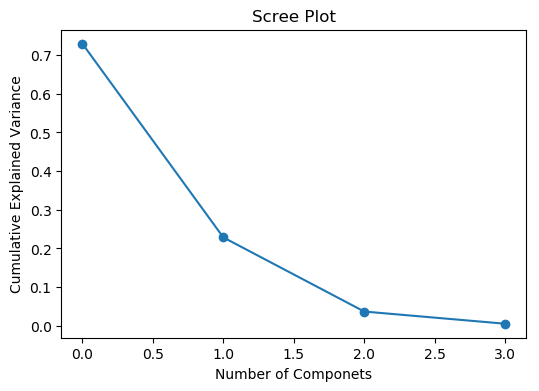

In [22]:
# Scree Plot으로 사용할 주성분 개수 정하기
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.title('Scree Plot')
plt.xlabel('Number of Componets')
plt.ylabel('Cumulative Explained Variance')
plt.plot(pca.explained_variance_ratio_, 'o-')
plt.show()

In [26]:
# 새로운 데이터프레임 확인
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x) # 2개의 주성분을 가진 데이터로 변환
principal_iris = pd.DataFrame(data = principalComponents, columns=['pc1', 'pc2'])
principal_iris.head()

,pc1,pc2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


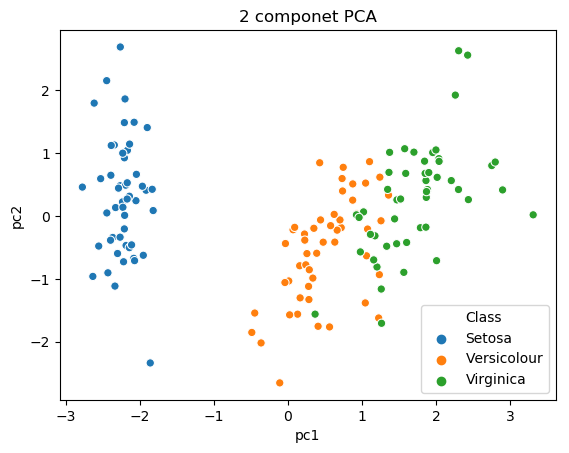

In [28]:
# 주성분 산포도 확인
# 원본 데이터프레임으로 그린 산포도보다 종속변수를 더 잘 설명하는 산포도를 확인할 수 있음.
import matplotlib.pyplot as plt
import seaborn as sns

plt.title('2 componet PCA')
sns.scatterplot(x='pc1', y='pc2', hue=iris.Class, data=principal_iris)
plt.show()

### 언더 샘플링
- 다수 레이블을 가진 데이터를 소수의 데이터세트가 가진 레이블의 수 수준으로 감소
- 전체 데이터 수가 줄어들어 학습 성능 저하

In [35]:
import warnings # 경고 문구 무시
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
x, y = make_classification(n_samples=2000, n_features=6, weights=[0.95], flip_y=0)
print(Counter(y))

Counter({0: 1900, 1: 100})


In [43]:
# Random Under Sampling: 다수를 차지하는 레이블에서 무작위로 데이터를 제거함
undersample = RandomUnderSampler(sampling_strategy='majority') # 다수 레이블의 데이터를 샘플링하여 소수 레이블 데이터 수와 동일하게..
x_under, y_under = undersample.fit_resample(x, y)
print(Counter(y_under))

undersample = RandomUnderSampler(sampling_strategy=.5) # 0~1 사이 값으로 비율 조정
x_under2, y_under2 = undersample.fit_resample(x, y)
print(Counter(y_under2))

Counter({0: 100, 1: 100})
Counter({0: 200, 1: 100})


C:\Users\user\anaconda3\envs\adp_code\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\user\anaconda3\envs\adp_code\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


### 오버 샘플링
- 소수 레이블을 지닌 데이터세트를 다수 레이블을 지닌 데이터세트의 수만큼 증가시킴
- 데이터 손실이 없어 언더 샘플링보다 성능이 유리하여 주로 사용됨.

In [42]:
# Random Over Sampling: 소수 레이블을 지닌 데이터세트를 단순 복제하여 다수의 레이블과 비율을 맞춤.
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy=0.5)
x_over, y_over = oversample.fit_resample(x, y)
print(Counter(y_over))

oversample = RandomOverSampler(sampling_strategy='minority')
x_over2, y_over2 = oversample.fit_resample(x, y)
print(Counter(y_over2))

Counter({0: 1900, 1: 950})
Counter({0: 1900, 1: 1900})


C:\Users\user\anaconda3\envs\adp_code\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\user\anaconda3\envs\adp_code\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [44]:
# SMOTE
from imblearn.over_sampling import SMOTE
smote_sample = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote_sample.fit_resample(x, y)
print(Counter(y_sm))

Counter({0: 1900, 1: 1900})


C:\Users\user\anaconda3\envs\adp_code\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


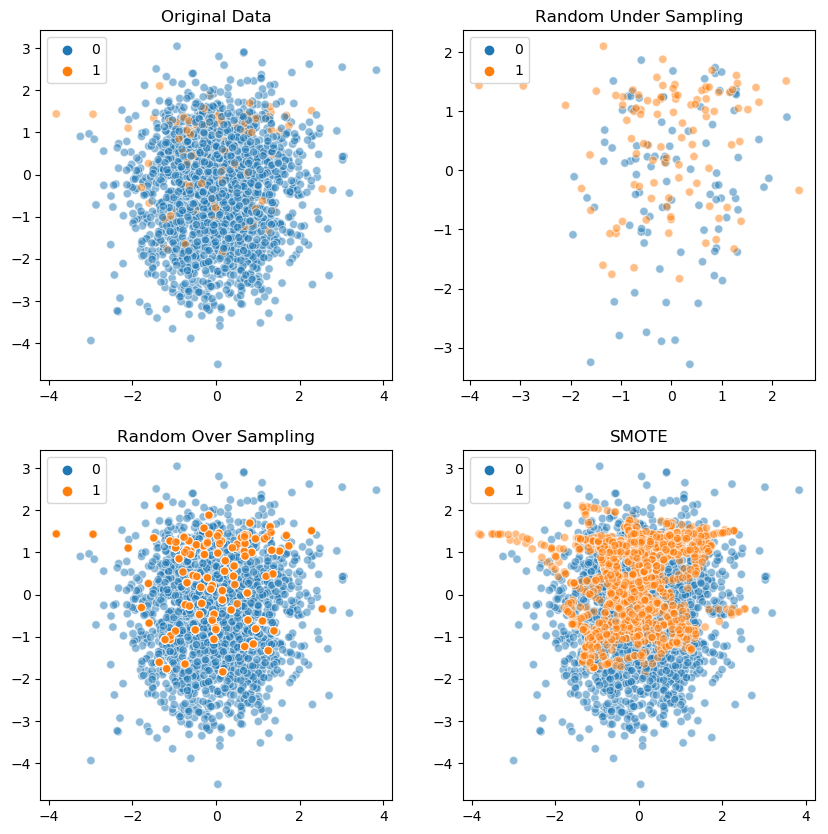

In [45]:
from matplotlib import pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

sns.scatterplot(x[:, 1], x[:, 2], hue=y, ax=axes[0][0], alpha=0.5)
sns.scatterplot(x_under[:, 1], x_under[:,2], hue=y_under, ax=axes[0][1], alpha=0.5)
sns.scatterplot(x_over[:, 1], x_over[:, 2], hue=y_over, ax=axes[1][0], alpha=0.5)
sns.scatterplot(x_sm[:, 1], x_sm[:, 2], hue=y_sm, ax=axes[1][1], alpha=0.5)

axes[0][0].set_title('Original Data')
axes[0][1].set_title('Random Under Sampling')
axes[1][0].set_title('Random Over Sampling')
axes[1][1].set_title('SMOTE')

plt.show()